<a href="https://colab.research.google.com/github/Akshata1992/Machine_Learning/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import all neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
#read the csv file
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [7]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [9]:
#combine both train and test set to perform data cleaning process
whole_data = train.append(test, ignore_index=True)
whole_data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [10]:
whole_data

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [11]:
#Remove the @user patter from tweets
def remove_pattern(in_txt,pattern):
  r = re.findall(pattern,in_txt)
  for i in r:
    in_txt = re.sub(i,'',in_txt)

  return in_txt

In [12]:
#create new column of cleaned tweets
whole_data['tidy_tweets'] = np.vectorize(remove_pattern)(whole_data['tweet'], '@[\w]*')
whole_data.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
#removing numbers,special characters etc. except hashtag and characters
whole_data['tidy_tweets'] = whole_data['tidy_tweets'].str.replace("[^a-zA-Z#]", " ")
whole_data.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [14]:
#remove short words.Careful while choosing the length of word.
whole_data['tidy_tweets'] = whole_data['tidy_tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w) > 3]))
whole_data.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [21]:
#tokenize the words
tokenized_tweets = whole_data['tidy_tweets'].apply(lambda x:x.split())
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweets, dtype: object

In [22]:
#stemming the words
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, cau, they, offer, wheel...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweets, dtype: object

In [23]:
#lets stich the tokens back together
for i in range(len(tokenized_tweets)):
  tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

whole_data['tidy_tweets'] = tokenized_tweets
whole_data.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


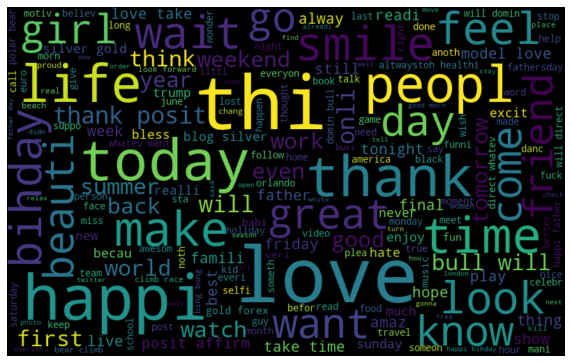

In [24]:
#visualize the most common words appeared in tweets
all_words = ' '.join([text for text in whole_data['tidy_tweets']])

from wordcloud import WordCloud
worldcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

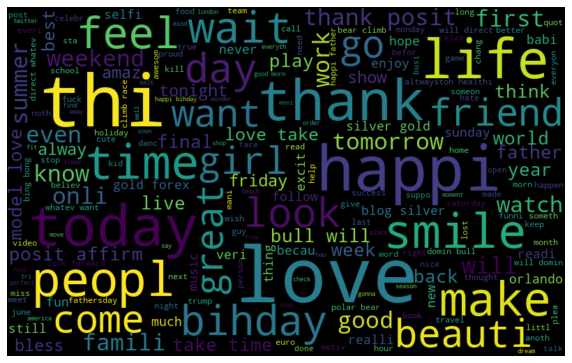

In [26]:
#visualize the words which are non racist or sexist
normal_words =' '.join([text for text in whole_data['tidy_tweets'][whole_data['label'] == 0]])

from wordcloud import WordCloud
worldcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

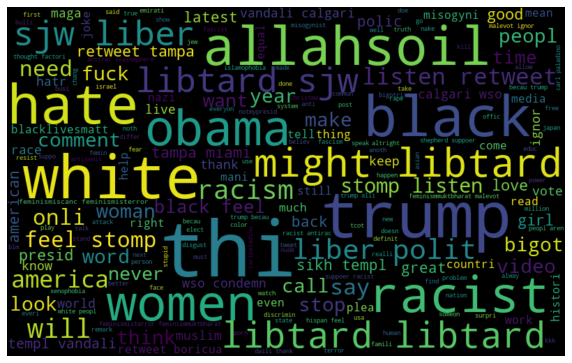

In [27]:
#visualize the words which are non racist or sexist
neg_words =' '.join([text for text in whole_data['tidy_tweets'][whole_data['label'] == 1]])

from wordcloud import WordCloud
worldcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(neg_words)

plt.figure(figsize=(10,7))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
#impacts of hashtag.Define a function to collect the hashtags to check it's importance
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht =re.findall(r'#(\w+)',i)
    hashtags.append(ht)

  return hashtags

In [29]:
#extracting hash tags from racist or sexist tweets
HT_neg = hashtag_extract(whole_data['tidy_tweets'][whole_data['label'] == 1])

#extracting hash tags from non racist or non sexist tweets
HT_reg = hashtag_extract(whole_data['tidy_tweets'][whole_data['label'] == 0])

#unnesting the list
HT_reg = sum(HT_reg,[])
HT_neg = sum(HT_neg,[])

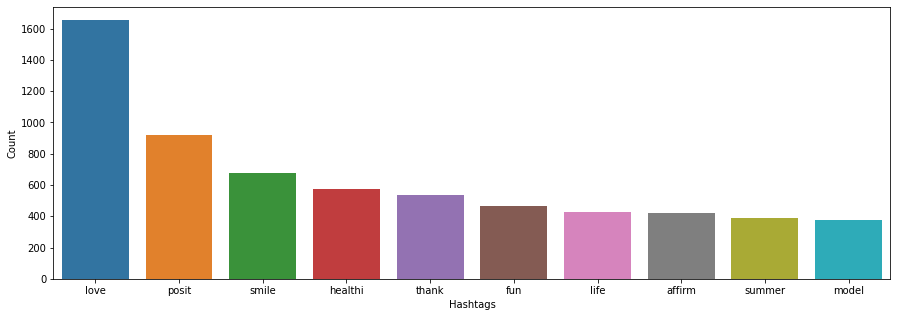

In [30]:
#visualise the hash tags for non racist or non sexist
a = nltk.FreqDist(HT_reg)
d = pd.DataFrame({'Hashtags': list(a.keys()),'Count': list(a.values())})

#select the top 10 most frequent hashtags
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d,x='Hashtags',y='Count')
ax.set(ylabel='Count')
plt.show()

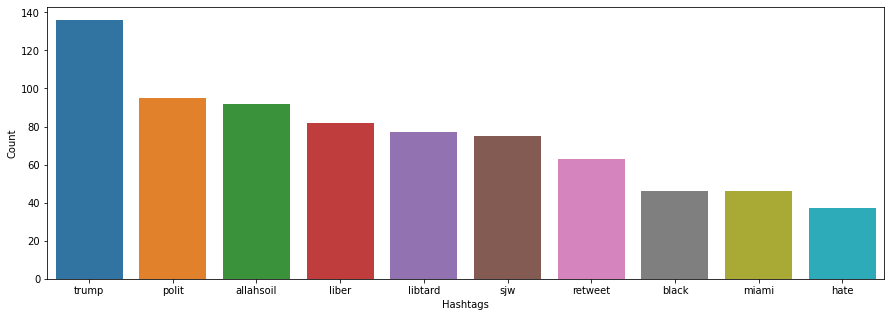

In [31]:
#visualise the hash tags for  racist or sexist
b = nltk.FreqDist(HT_neg)
c = pd.DataFrame({'Hashtags': list(b.keys()),'Count': list(b.values())})

#select the top 10 most frequent hashtags
c = c.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,5))
ax = sns.barplot(data=c,x='Hashtags',y='Count')
ax.set(ylabel='Count')
plt.show()

In [32]:
#extract the meaning from tokens
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

bow = bow_vect.fit_transform(whole_data['tidy_tweets'])

In [33]:
#build binary classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [34]:
#get the train andtest data
train_data = bow[:31962,:]
test_data = bow[31962:,:]

x_train,x_test,y_train,y_test = train_test_split(train_data,train['label'],test_size=0.3,random_state=42)

#train the model
model = LogisticRegression()
model.fit(x_train,y_train)

#predict the model
pred = model.predict_proba(x_test)
pred_int = pred[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
pred_int = pred_int.astype(np.int)

#Compute the f1-score
f1_score(y_test,pred_int)

0.5293132328308208

In [36]:
test_pred = model.predict_proba(test_data)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file